MAJOR PROJECT SUBMISSION - ML AND PYTHON INTERSHIP 

Project : Breast Cancer Predictions 
Students_Name : (1) VijayLuxmi Maddheshiya_13001172021 ,(2)  Aannika Arrya Yadav_13201172021 



BREAST CANCER PREDICTIONS 

In [ ]:
# Loading the data 
import pandas as pd 
Data = pd.read_csv("/content/Breast_Cancer(1).csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = Data

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


EDA

In [ ]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df.duplicated().sum()

0

Conclusion : The given data does not contain duplicates 

In [ ]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

Conclusion : No null values in any columns overall 

In [ ]:
cols = list(df.columns)
print(cols)

['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']


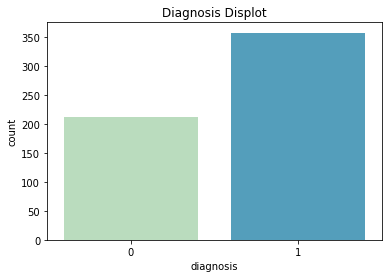

In [ ]:
sns.countplot(x='diagnosis', data=df, palette='GnBu')
plt.title('Diagnosis Displot')
plt.show()

Our main metric to measure the performance will be f1 along with precision and recall as there is a little bit of data imbalance

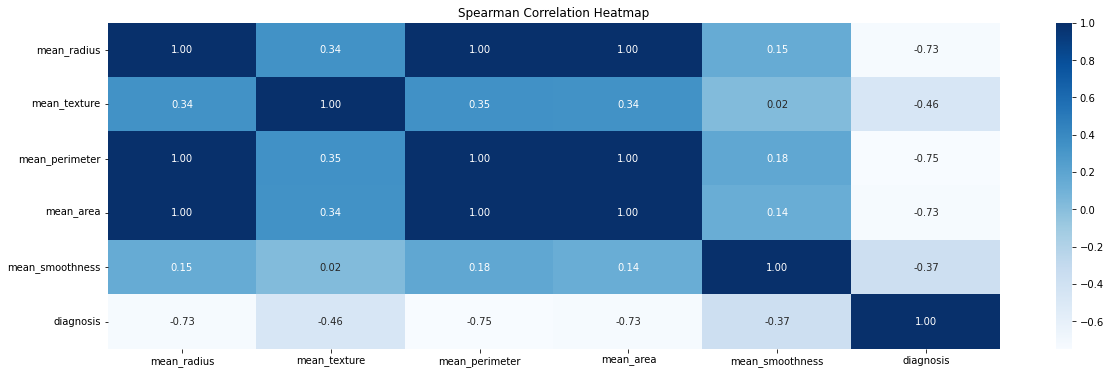

In [ ]:
corr = df.corr(method = 'spearman')
plt.figure(figsize=(20,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')
plt.title('Spearman Correlation Heatmap')
plt.show()

No two columns are highly correlated so no need to drop any column.

<Figure size 1440x720 with 0 Axes>

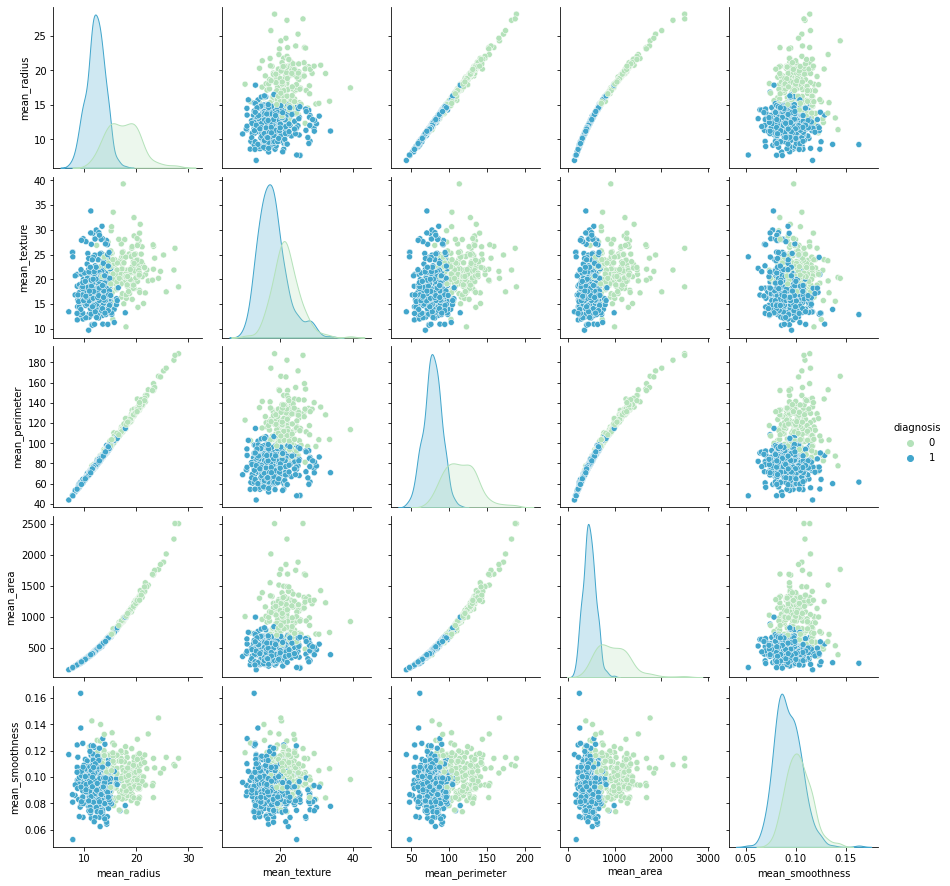

In [ ]:
figure = plt.figure(figsize=(20,10))
sns.pairplot(df, hue='diagnosis', palette='GnBu')
plt.show()

Data looks separable with high accuracy

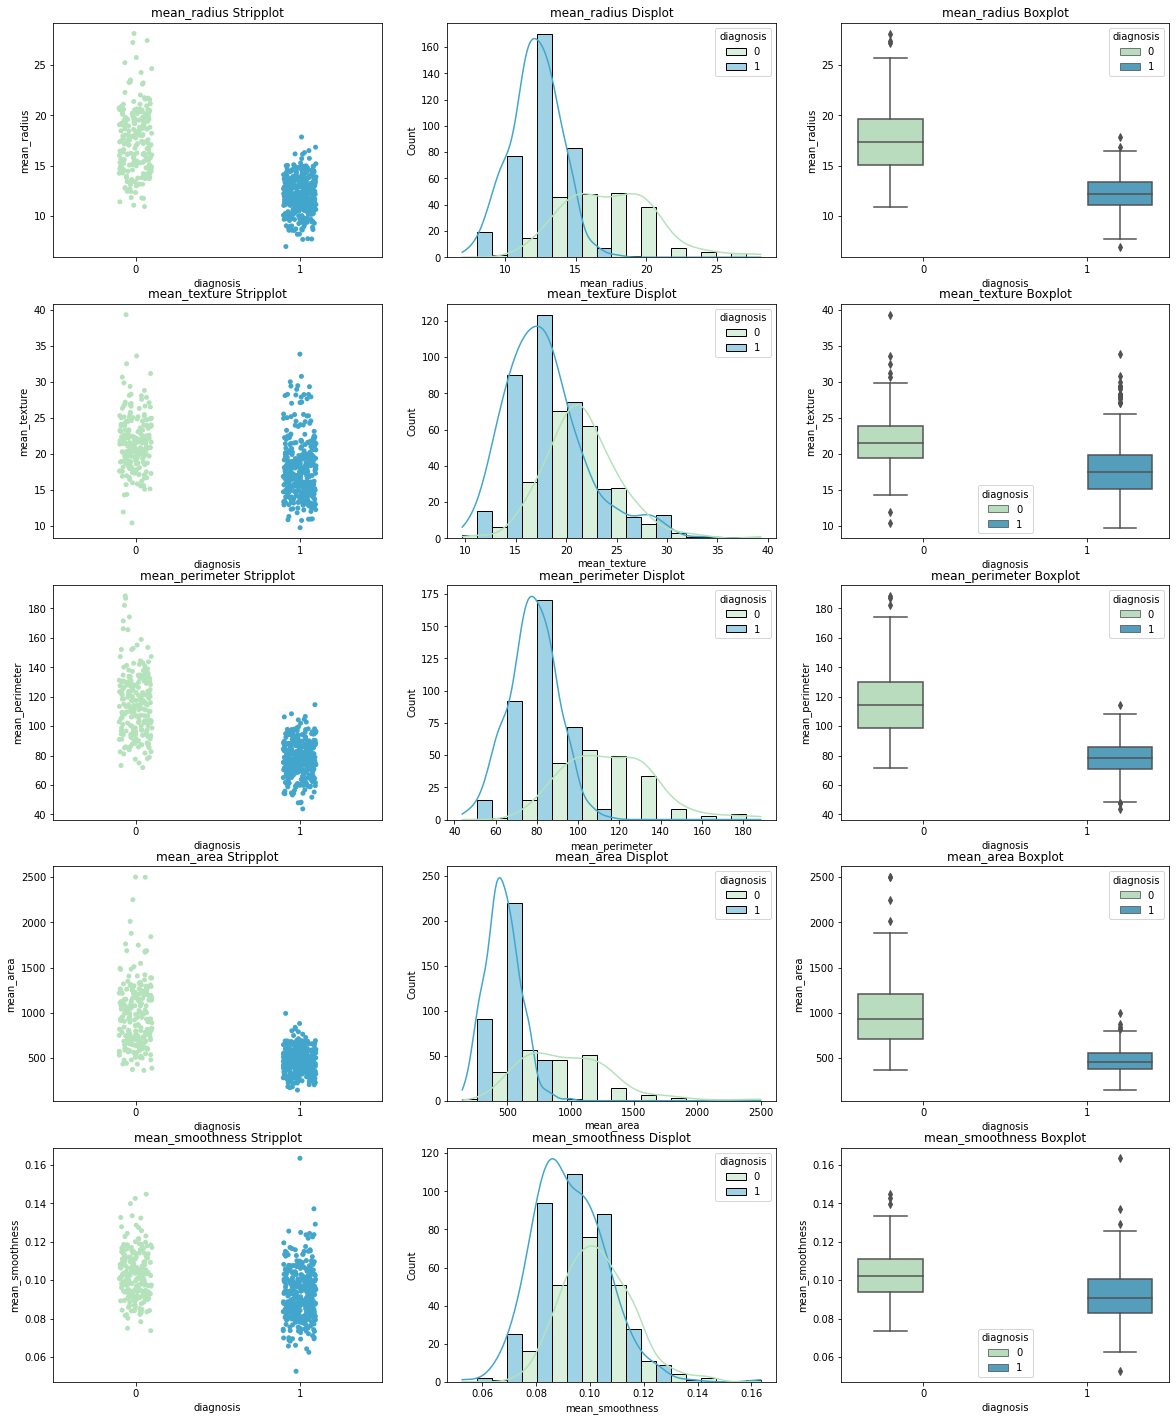

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20,25))
for i, col in zip(range(5), cols):
    sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='GnBu', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df, kde=True, bins=10, palette='GnBu', hue='diagnosis', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='diagnosis', y=col, data=df, palette='GnBu', hue='diagnosis')
    axes[i][2].set_title(f'{col} Boxplot')

In [ ]:
def outlier_limits(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_limits(df, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(df, variable, q1 = q1, q3 = q3)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit
    
for variable in cols:
    replace_with_limits(df, variable)

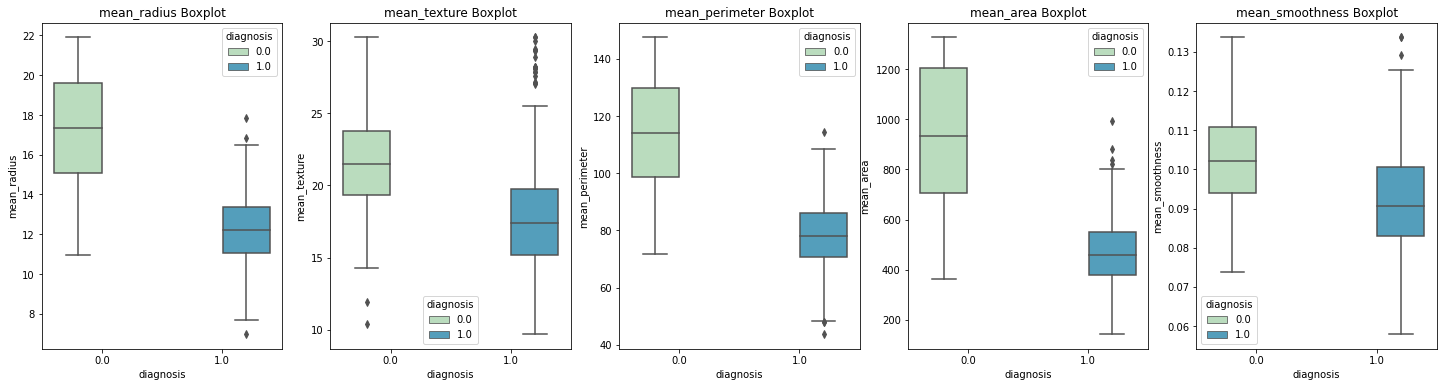

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(25,6))
for i, col in zip(range(5), cols):
    sns.boxplot(ax=axes[i], x='diagnosis', y=col, data=df, palette='GnBu', hue='diagnosis')
    axes[i].set_title(f'{col} Boxplot')

Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=cols)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.737918,0.032627,0.761873,0.724975,0.798006,0.0
1,0.910852,0.392501,0.859264,0.999746,0.353473,0.0
2,0.851867,0.561967,0.831300,0.895756,0.681788,0.0
3,0.297540,0.519601,0.325828,0.205107,1.000000,0.0
4,0.892084,0.225469,0.880478,0.975228,0.558967,0.0


In [ ]:
X = df_scaled.iloc[:,:5]
y = df_scaled['diagnosis']
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,0.737918,0.032627,0.761873,0.724975,0.798006
1,0.910852,0.392501,0.859264,0.999746,0.353473
2,0.851867,0.561967,0.831300,0.895756,0.681788
3,0.297540,0.519601,0.325828,0.205107,1.000000
4,0.892084,0.225469,0.880478,0.975228,0.558967


**Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    }

In [ ]:
def fit(clf, params, cv=10, X_train=X_train, y_train=y_train):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring=scoring, refit='f1') #verbose and n_jobs help us see the computation time and score of a cv. Higher the value of verbose, more the information printed out.
    grid.fit(X_train, y_train)
    return grid

In [ ]:

def make_predictions(model, X_test=X_test):
    return model.predict(X_test)

In [ ]:
def best_scores(model):
    best_mean_f1 = max(list(model.cv_results_['mean_test_f1']))
    mean_f1_index = list(model.cv_results_['mean_test_f1']).index(best_mean_f1)
    print(f'The best parameters are: {model.best_params_}')
    print('Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)')
    print('The best score that we get is (Accuracy): ' + str(model.cv_results_['mean_test_accuracy'][mean_f1_index]))
    print('The best score that we get is (Precision): ' + str(model.cv_results_['mean_test_precision'][mean_f1_index]))
    print('The best score that we get is (Recall): ' + str(model.cv_results_['mean_test_recall'][mean_f1_index]))
    print(f'The best score that we get is (F1 Score): {best_mean_f1}')
    return None

In [ ]:
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large') 
    plt.xlabel('Predictions', fontsize=14)
    plt.ylabel('Actuals', fontsize=14)
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()
    return None

In [ ]:
def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    return None

In [ ]:
import warnings
warnings.filterwarnings('always')

LOGISTIC REGRESSION 

In [ ]:
lr_params = {'C':[0.001,.009,0.01,.09,1,5,10,25], 'penalty':['l1', 'l2']} #lasso and ridge regression
lr_clf = LogisticRegression(solver='saga', max_iter=5000)
lr_model = fit(lr_clf, lr_params)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [ ]:
best_scores(lr_model)

The best parameters are: {'C': 10, 'penalty': 'l2'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.9485603543743079
The best score that we get is (Precision): 0.9509659219987363
The best score that we get is (Recall): 0.9688095588957658
The best score that we get is (F1 Score): 0.9584005509459557


In [ ]:
lr_y_pred = make_predictions(lr_model)
check_scores(lr_y_pred)

Precision: 0.941
Recall: 0.889
Accuracy: 0.895
F1 Score: 0.914


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



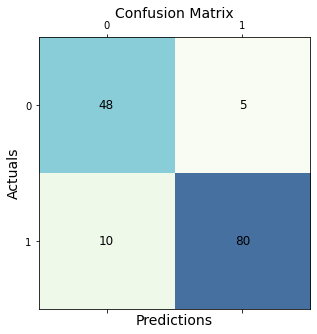

In [ ]:
plot_confusion_matrix(lr_y_pred)

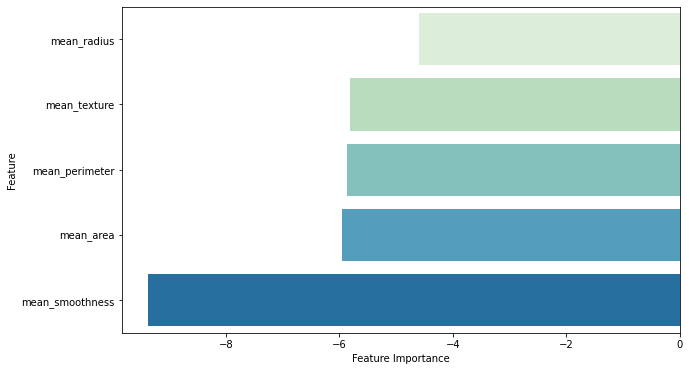

In [ ]:
lr_feature_scores = lr_model.best_estimator_.coef_[0].tolist()
lr_fi = pd.DataFrame({'Feature': X.columns, 'Feature Importance': lr_feature_scores})
plt.figure(figsize=(10,6))
sns.barplot(x='Feature Importance', y='Feature', data=lr_fi, palette='GnBu', )
plt.show()

Linear Discriminant Analysis 

In [ ]:
lda_params = {'solver': ['svd', 'eigen']}
lda_clf = LDA()
lda_model = fit(lda_clf, lda_params)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
best_scores(lda_model)

The best parameters are: {'solver': 'svd'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.9250830564784053
The best score that we get is (Precision): 0.8984756462175817
The best score that we get is (Recall): 0.9916666666666666
The best score that we get is (F1 Score): 0.9422476193799723


In [ ]:
lda_y_pred = make_predictions(lda_model)
check_scores(lda_y_pred)

Precision: 0.925
Recall: 0.956
Accuracy: 0.923
F1 Score: 0.940


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



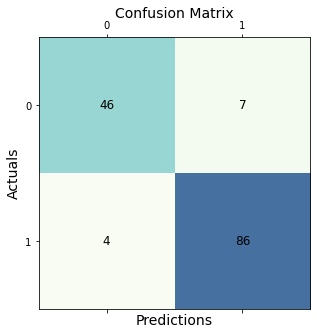

In [ ]:
plot_confusion_matrix(lda_y_pred)

SUPPORT VECTOR MACHINE 

In [ ]:
svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svm_clf = SVC()
svm_model = fit(svm_clf, svm_params)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [ ]:
best_scores(svm_model)

The best parameters are: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.9461794019933555
The best score that we get is (Precision): 0.948182131714946
The best score that we get is (Recall): 0.968952009038216
The best score that we get is (F1 Score): 0.9571074233952169


In [ ]:
svm_y_pred = make_predictions(svm_model)
check_scores(svm_y_pred)

Precision: 0.953
Recall: 0.900
Accuracy: 0.909
F1 Score: 0.926


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



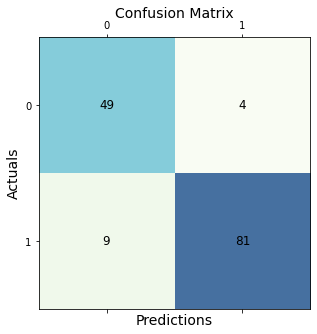

In [ ]:
plot_confusion_matrix(svm_y_pred)

KNN'S

In [ ]:
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'], 
               'metric': ['euclidean', 'manhattan']}
knns_clf = KNeighborsClassifier()
knns_model = fit(knns_clf, knns_params)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the r

In [ ]:
best_scores(knns_model)

The best parameters are: {'metric': 'euclidean', 'n_neighbors': 22, 'weights': 'uniform'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.9413621262458471
The best score that we get is (Precision): 0.9402913905605788
The best score that we get is (Recall): 0.9691300717162787
The best score that we get is (F1 Score): 0.9539638286307939


In [ ]:
knns_y_pred = make_predictions(knns_model)
check_scores(knns_y_pred)

Precision: 0.955
Recall: 0.933
Accuracy: 0.930
F1 Score: 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



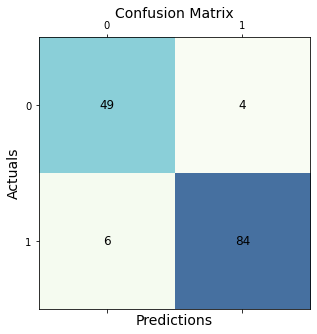

In [ ]:
plot_confusion_matrix(knns_y_pred)

Question and Answers 

In [ ]:
df.head(2)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0.0
1,20.57,17.77,132.9,1326.0,0.08474,0.0


In [ ]:
#Q1 Mean Area of Abnormal lumps :
# 640 units s

639.7652021089631

In [ ]:
#Q2 Confusion matrix of all models has been ploted kindly see the code 

In [ ]:
# By Clear observation KNN is providing f1 value thus it is surely one of the best 
# values of precision ,recall and f1 is as follows :
knns_y_pred = make_predictions(knns_model)
check_scores(knns_y_pred)

Precision: 0.955
Recall: 0.933
Accuracy: 0.930
F1 Score: 0.944


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


In [ ]:
#Q3 I have choosen KNN as best model for our breast prediction because of its highest accuracy and f1 value.  

In [ ]:
#Q4 Written in a code 